Estudiante 1:

Estudiante 2:

----

# IMEC2201 Herramientas Computacionales 
## Taller Semana 8: Ecuaciones diferenciales ordinarias - ODE
### Fecha Límite Entrega (Bloque Neón): <font color="#FF5733">23:59h de Octubre 2, 2022</font>

Universidad de los Andes — 26 de Septiembre, 2022.
___
### <u>Tener en Cuenta</u>
- La entrega del taller es por Bloque Neon y se envía el archivo en formato de Jupyter Notebook (extensión '.ipynb').
- El nombre del archivo debe ser: `T8_Apellidos`.
Ej: T8_VargasTorres; T8_SalazarPeña_VargasTorres
- En la casilla anterior a esta coloque su nombre o los nombres (Máximo 2 personas).
- Si el taller se hizo en parejas, solo lo envía <b>1</b> persona.
___


## Semana 8

En esta semana se tienen las ecuaciones diferenciales ordinarias, esto implica que solo se trabaja con el cambio respecto a <b>una</b> variable. Un ejemplo de lo anterior es la ecuación que describe el sistema masa, resorte amortiguador dada por:

$$m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0$$

En este caso la variable de estudio es x, que es la posición, la velocidad [$\dot{x}$] y la aceleración [$\ddot{x}$]. Otro de los problemas comunes de ODE son los de transferencia de calor, estos están descritos por una ecuación de segundo orden (El gradó más grande de las derivadas que tiene la ecuación es 2), para encontrar una solución al sistema se utiliza el método de diferencias finitas. En este se sustituyen las derivadas de la ecuación $(y', \dot{y}, \frac{dy}{dt})$ con aproximaciones mediante las diferencias finitas dividas, teniendo así un sistema de ecuaciones algebraicas. La segunda derivada en diferencias finitas dividas centradas es de la siguiente forma:

$$\frac{d^2T}{dx^2}=\frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}$$

Esta ecuación se aplica a cada nodo o punto que se esté estudiando para conocer su temperatura. Si se asume un $\Delta x = 1$ (Espacio entre los nodos) y que no hay una afectación de factores externos (convección, radiación o conducción) la ecuación queda de la siguiente forma:

$$T_{i+1}-2T_i+T_{i-1} = 0$$

## Ejercicio 1
----

<img src='./img/Temperaturas_P1.jpg'>

Para el sistema mostrado que se quieren conocer las temperaturas en cada nodo ($T_1, T_2, T_3, T_4$). $T_{\infty_1}$ y $T_{\infty_2}$ no se toman como nodos ya que son condiciones de borde. Utilizando la aproximación de diferencias finitas resuelva para los siguientes dos casos:

Caso 1: $T_{\infty_1} = 20$ y $T_{\infty_2} = 50$ 

Caso 2: $T_{\infty_1} = 20$ y $T_{\infty_2} = 200$

Para cada uno:

1. Escriba las ecuaciones de cada uno de los nodos. 
- **BONO 1:** Puede escribir el sistema de ecuaciones una sola vez, pero debe específicar cuáles ecuaciones cambian y por qué.
- **BONO 2:** Escriba una expresión general para el sistema mostrado.
    
2. Teniendo las ecuaciones planteadas en el literal anterior resuelva el sistema.
- **Nota:** Como puede ver en las ecuaciones planteadas se tienen n incongnitas con n ecuaciones, estos sistemas se pueden resolver con las librerías y métodos vistos las semanas anteriores.
- Puede utilizar la función `np.diag()` para plantear las ecuaciones
3. En una sola gráfica muestre las temperaturas en cada punto para cada caso, debe gráficar también las condiciones de borde. Por lo que tiene una gráfica con 6 puntos, el primero y el último son los del enunciado (C1: 20, 50 | C2: 20, 200) y los otros 4 son las soluciones del sistema. 

Las ecuaciones que describen el sistema son:

$$
\begin{bmatrix}  %Vector de Coeficientes
	-2 & 1 & 0 & 0 \\
	 1 & -2 & 1 & 0 \\
    0 & 1 & -2 & 1 \\
    0 & 0 & 1 & -2 
\end{bmatrix} 
\begin{Bmatrix} %Vector de incognitas
	T_1 \\
	T_2 \\
    T_3 \\
    T_4
\end{Bmatrix} = 
\begin{Bmatrix} %Vector de términos independentes
	-20 \\
    0 \\
    0 \\
    - 50
\end{Bmatrix} 
$$

**Bono 1:** El sistema cambia en el vector de términos independientes ya que estas son las condiciones de borde dadas por el sistema.

**Bono 2:**

$$
\begin{bmatrix}  %Vector de Coeficientes
	-2 & 1 & 0 & 0 \\
	 1 & -2 & 1 & 0 \\
    0 & 1 & -2 & 1 \\
    0 & 0 & 1 & -2 
\end{bmatrix} 
\begin{Bmatrix} %Vector de incognitas
	T_1 \\
	T_2 \\
    T_3 \\
    T_4
\end{Bmatrix} = 
\begin{Bmatrix} %Vector de términos independentes
	- T_{\infty_1}\\
    0 \\
    0 \\
    - T_{\infty_2}
\end{Bmatrix} 
$$

In [9]:
# Importar liberías 
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt

In [2]:
# Función para calcular la solución del sistema

def linalg_ (A: np.array, B: np.array) ->  np.array:
    """
    Método de solución por inversa de la matríz 

    Parameters
    ----------
    A : np.array
        Matriz de coeficientes.
    B : np.array
        Matriz de terminos independientes.

    Returns
    -------
    sol : np.array
        Solución del sistema de ecuaciones.

    """
    # Inversa de la matriz
    invA = linalg.inv(A)

    # x = [A]^{-1}[B] Solución del sistema
    sol = np.dot(invA, B)
    return sol

In [60]:
# Matriz de coeficientes
n = 4                         # Número de incognitas 
diag_1 = np.zeros(n)- 2       # Diagonal central de la matriz 
diag_2 = np.zeros(n - 1)+ 1   # Diagonal superior e inferior de la matriz 

A = np.diag(diag_1) + np.diag(diag_2, 1) + np.diag(diag_2, -1)

# Vector de términos independientes 
B_Caso_1 = np.array([-20, 0, 0, -50])
B_Caso_2 = np.array([-20, 0, 0, -200])

# Solución caso 1
sol_caso_1 = np.append(20, linalg_(A, B_Caso_1))
sol_caso_1 = np.append(sol_caso_1, 50)

# Solución caso 2
sol_caso_2 = np.append(20, linalg_(A, B_Caso_2))
sol_caso_2 = np.append(sol_caso_2, 200)

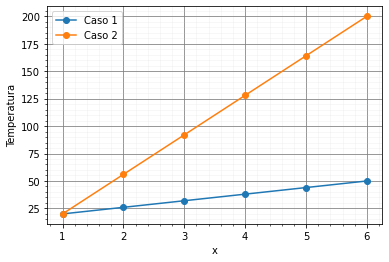

In [67]:
# Nodos 
nodos = np.arange(1, 7)

# Gráfica
plt.plot(nodos, sol_caso_1, '-o', label='Caso 1')
plt.plot(nodos, sol_caso_2, '-o', label='Caso 2')
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.legend()
plt.ylabel('Temperatura')
plt.xlabel('x')
plt.show()


### Ejercicio 2
----

El siguiente sistema representa de forma simplificada una pelota que rebota contra el piso. Se denota por $x(t)$ a la posición vertical de la pelota y con $v(t)$ la velocidad (positiva hacía arriba). Se tienen los siguientes escenarios: 

1. Cuando $x(t) > 0$ la pelota está en el aire y satisface la siguiente ecuación:

$$m\dot{v} = -b_a v - mg$$

- $m$ es la masa de la pelota
- $b_a$ es el coeficiente de rozamiento del aire
- $g$ es el valor de la gravedad


2. Cuando $x(t) < 0$ la pelota está en contacto con el piso, esta se modela como un sistema masa - resorte:

$$m\dot{v} = -kx - bv -mg$$

- $b$ es la constante de amortiguamiento del suelo
- $k$ es la constante de elasticidad del suelo

El modelo se puede plantear como un sistema lineal a trozos, calculando así tramos de la solución. Considere los siguientes parámetros:

- $b_a = 0.1$
- $m = 1$
- $b = 30$
- $g = 9.8 $
- $k =$ Los primeros 6 dígitos de su código dividido 2

Como condiciones iniciales se tienen que:

- $x(0) = 10$
- $v(0) = 0$


Para el ejercicio debe realizar lo siguiente:
1. Plantear el sistema de ecuaciones de primer orden para cada caso 
2. Calcular y gráficar un tramo de la solución desde la condición inicial hasta el tiempo $t_1$ en el que se cumple que $x(t_1)=0$.
3. Utilizando como condición inicial los valores finales del tramo obtenido en el punto anterior: $x(t_1) = 0$, $v(t_1)$ calcular un nuevo tramo de la solución hasta un instante $t_2$ en que se verifique nuevamente $x(t_2)=0$.
4. Repetir el procedimiento anterior varias vecces y gráficar la solución. 

$$\ddot{x} = \frac{1}{m}(-b_a \dot{x} - mg)$$
$$\ddot{x} = \frac{1}{m}(-kx - b\dot{x} -mg)$$


In [10]:
# Importar librerias 
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Función formato gráfica
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

In [7]:
# Definición de parámetros 

m = 1             # Masa
b_a = 0.1         # Coeficiente de rozamiento del aire
b = 30            # Constante de amortiguamiento del suelo
g = 9.8           # Gravedad
k = (2011231)/2   # Constante de elasticidad del suelo


# Definir ecuación

def ecuacion(variables, t):
    x = variables[0]
    dx_dt = variables[1]
    
    if (x > 0):
        d2x_dt2 = (1/m)*(-b_a*dx_dt - m*g)
    else:
        d2x_dt2 = (1/m)*(-k*x - b*dx_dt - m*g)
        
    return [dx_dt, d2x_dt2]

# Condiciones iniciales
# x(0) = 10
# v(0) = 0
con_init = [10, 0]   

# Paso de tiempo que se va a estudiar 
time = np.linspace(0, 10, 97)   

In [8]:
# Solucionar ODE

sol = integrate.odeint(func=ecuacion, 
                       y0=con_init, 
                       t=time)
sol

array([[ 1.00000000e+01,  0.00000000e+00],
       [ 9.94701587e+00, -1.01553492e+00],
       [ 9.78879577e+00, -2.02054624e+00],
       [ 9.52643035e+00, -3.01514304e+00],
       [ 9.16099884e+00, -3.99943322e+00],
       [ 8.69356926e+00, -4.97352359e+00],
       [ 8.12519858e+00, -5.93751986e+00],
       [ 7.45693281e+00, -6.89152661e+00],
       [ 6.68980713e+00, -7.83564738e+00],
       [ 5.82484598e+00, -8.76998460e+00],
       [ 4.86306319e+00, -9.69463965e+00],
       [ 3.80546207e+00, -1.06097129e+01],
       [ 2.65303556e+00, -1.15153036e+01],
       [ 1.40676630e+00, -1.24115100e+01],
       [ 6.76267575e-02, -1.32984293e+01],
       [ 1.17053399e+00,  1.16709333e+01],
       [ 2.32696195e+00,  1.05344571e+01],
       [ 3.36562147e+00,  9.40975785e+00],
       [ 4.28773289e+00,  8.29671338e+00],
       [ 5.09450393e+00,  7.19520294e+00],
       [ 5.78712984e+00,  6.10510702e+00],
       [ 6.36679347e+00,  5.02630732e+00],
       [ 6.83466537e+00,  3.95868680e+00],
       [ 7.

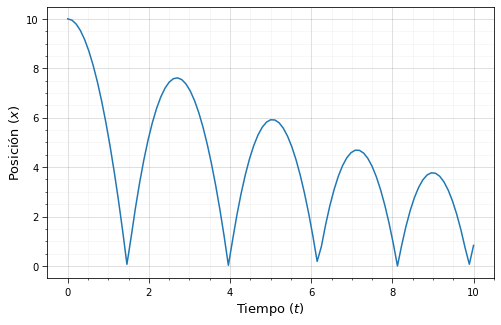

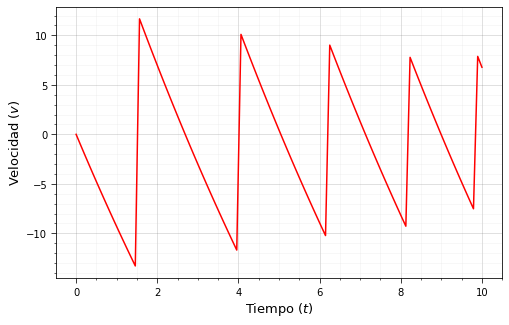

In [14]:
fig = plt.figure(figsize=(8, 5))
plt.plot(time, sol[:,0], label='Posición')

formato_grafica(titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='Posición ($x$)',
                leyenda=False)

fig = plt.figure(figsize=(8, 5))
plt.plot(time, sol[:,1], 'r')

formato_grafica(titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='Velocidad ($v$)',
                leyenda=False)